In [1]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import os
import glob
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

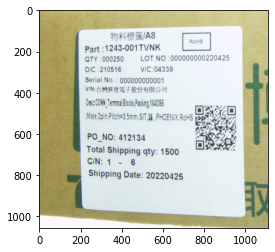

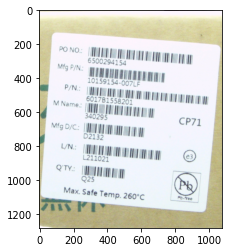

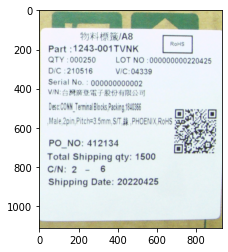

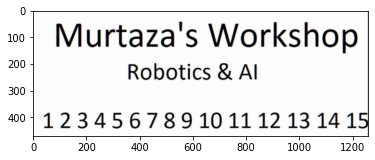

In [13]:
img_list = []

files = glob.glob('./*.jpg')

i = 0
for file in files:
    img_list.append(cv2.imread(file))
    img_list[i] = cv2.cvtColor(img_list[i], cv2.COLOR_BGR2RGB)
    i +=1
    
for img in img_list:
    plt.imshow(img)
    plt.show()

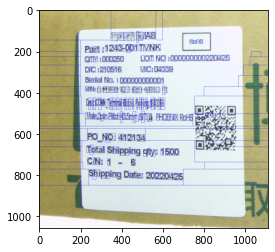

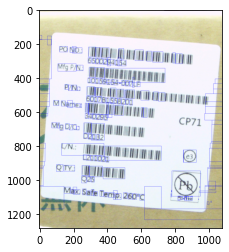

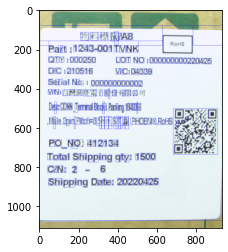

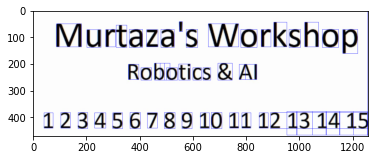

In [14]:
for i in range(len(img_list)):
    hImg, wImg, _ = img_list[i].shape
    boxes = pytesseract.image_to_boxes(img_list[i])

    for b in boxes.splitlines():
        #print(b)
        b = b.split(' ')
        #print(b)
        x,y,w,h = int(b[1]), int(b[2]), int(b[3]), int(b[4])
        cv2.rectangle(img_list[i], (x, hImg -y), (w, hImg -h), (0,0,255),1)    
    plt.imshow(img_list[i])
    plt.show()
    cv2.imwrite('./output/result_'+str(i)+'.jpg',img_list[i])